# Master M2 MVA 2018/2019 - Graphical models - HWK 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}
from utils.KMeans import KMeans
from utils.IsotropicGM import IsotropicGM
from utils.GaussianMixtureModel import GaussianMixtureModel, FIGSIZE, MARKER, MARKER_COLOR, CMAP, MARKER_SIZE

#### Load datasets 

In [2]:
train = pd.read_table("data/EMGaussian.data", sep=" ", header=None)
test = pd.read_table("data/EMGaussian.test", sep=" ", header=None)

n_sample_train, n_feature = train.shape
n_sample_test = test.shape[0]

print "Traning set : ", train.shape
print "Testing set : ", test.shape

train = train.values
test = test.values


Traning set :  (500, 2)
Testing set :  (500, 2)


__Visualization__

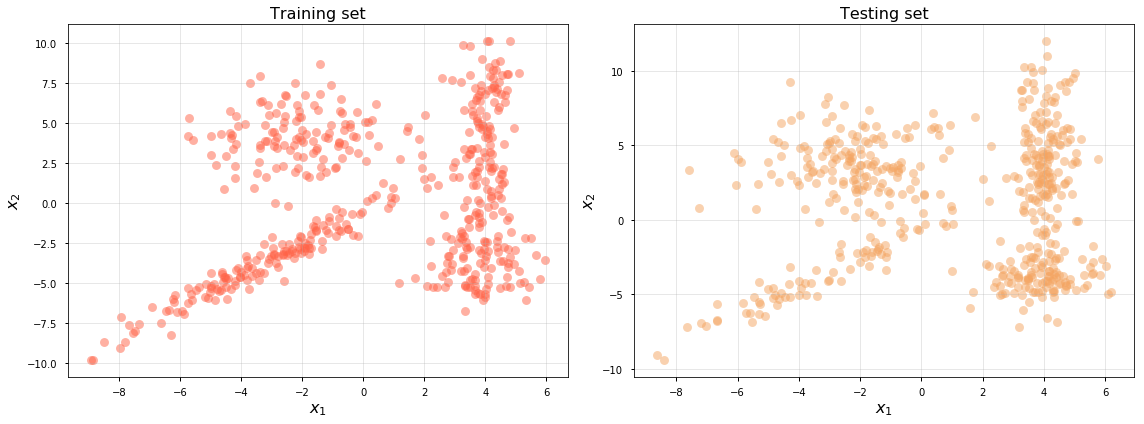

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].scatter(*train.T, color="tomato", **plot_kwds)
ax[0].grid(alpha=0.3)
ax[0].set_xlabel(r"$x_{1}$", size=16)
ax[0].set_ylabel(r"$x_{2}$", size=16)
ax[0].set_title("Training set", size=16)


ax[1].scatter(*test.T, color = "sandybrown", **plot_kwds)
ax[1].grid(alpha=0.3)
ax[1].set_xlabel(r"$x_{1}$", size=16)
ax[1].set_ylabel(r"$x_{2}$", size=16)
ax[1].set_title("Testing set", size=16)

plt.tight_layout()

## KMeans

$$\text{Distorsion function :  }\enspace J(\mu, z) = \frac{1}{n}\sum_{i=1}^{n}\sum_{k=1}^{K}\mathbb{1}_{\{x_{i}\in C_{k}\}}\|x_{i}-\mu_{k}\|^{2}$$

Where $C_{k}$ denotes cluster $k$

We here try several random initialization and Kmeans++ initializations by setting the maximum number of iterations to 300.

__Conclusion__ :
- Final distorsions are very similar but not identical which points out sensibility to intialization. Same conclusion for centroids
- Distorsion after 300 iterations is lower for Kmeans++ which underlines its ability to converge faster

### Random initialization

/Users/dieze/anaconda/envs/ptc_env/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dieze/anaconda/envs/ptc_env/lib/python2.7/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


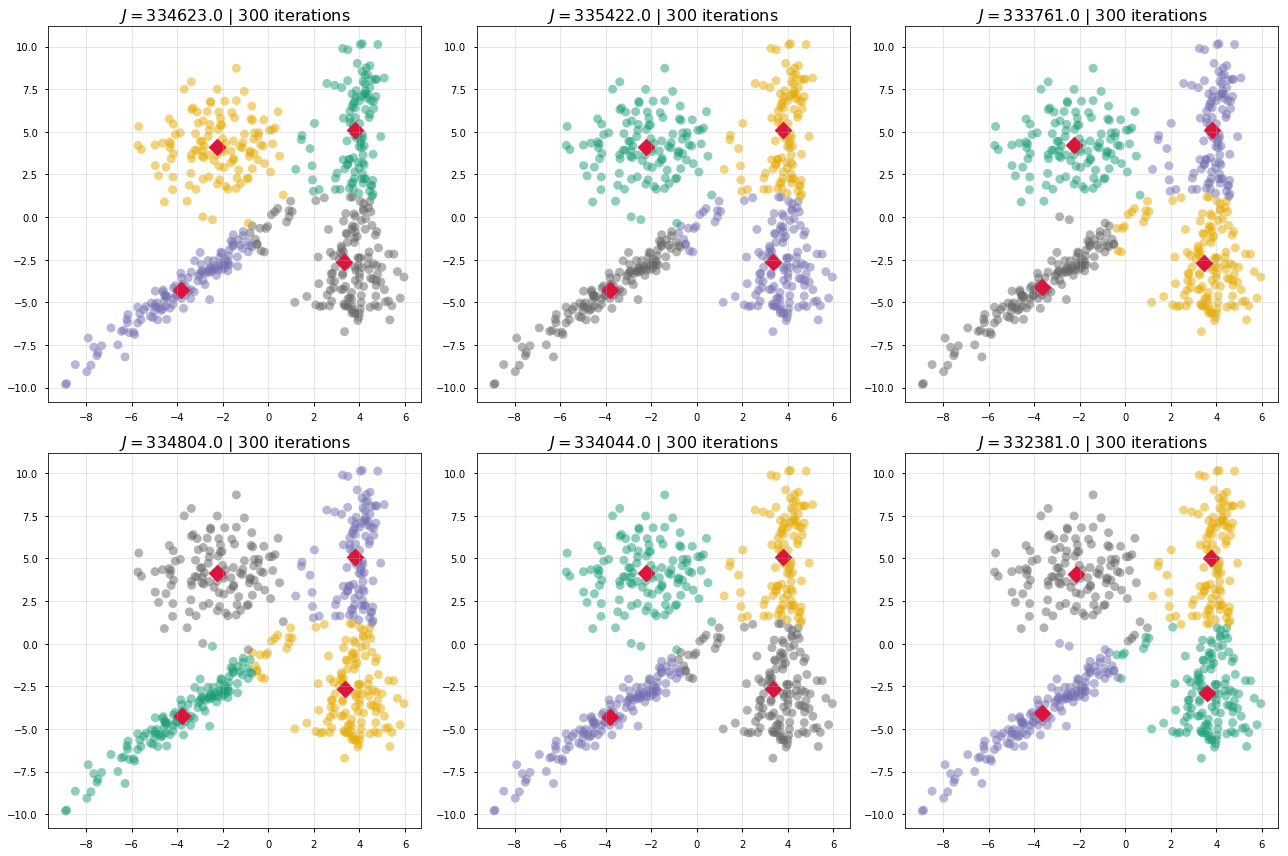

In [4]:
n_row = 2
n_col = 3
seed = [1, 3, 7, 13, 17, 37]

fig, ax = plt.subplots(n_row, n_col, figsize = (18, 12))

distorsions = []
centroids = []

for i in range(n_row):
    for j in range(n_col):
        np.random.seed(seed[n_col*i+j])

        kmeans = KMeans(nr_clusters=4, n_init=1, init='random')
        kmeans.fit(train)

        ax[i][j].scatter(*train.T, c=kmeans.labels_, cmap=CMAP, **plot_kwds)
        ax[i][j].scatter(*kmeans.centroids_.T, marker=MARKER, s=MARKER_SIZE, color=MARKER_COLOR)

        nr_iterations = str(kmeans.n_iter_)
        distortion = round(kmeans.distorsion_,0)
        distorsions += [distortion]
        foo = list(kmeans.centroids_)
        foo.sort(key=lambda x: x[0])
        centroids += [np.array(foo)]

        ax[i][j].set_title(r"$J = $" + str(distortion) + " | " + nr_iterations + " iterations", size=16)
        ax[i][j].grid(alpha=0.3)
plt.tight_layout()

> __Results table__

In [5]:
indexes = [range(1, 7)]
columns = ['normalized J']
for i in range(1,5):
    columns += [r"\mu_{" + str(i) + r", x}"]
    columns += [r"\mu_{" + str(i) + r", y}"]
data = np.hstack([np.array(distorsions).reshape(6,1) / n_sample_train, np.array(centroids).reshape(6, 8)])

pd.DataFrame(data, index=indexes, columns=columns).round(3)

,normalized J,"\mu_{1, x}","\mu_{1, y}","\mu_{2, x}","\mu_{2, y}","\mu_{3, x}","\mu_{3, y}","\mu_{4, x}","\mu_{4, y}"
1,669.246,-3.819,-4.274,-2.240,4.127,3.336,-2.645,3.803,5.105
2,670.844,-3.819,-4.274,-2.240,4.127,3.336,-2.645,3.803,5.105
3,667.522,-3.661,-4.068,-2.245,4.237,3.478,-2.697,3.803,5.105
4,669.608,-3.785,-4.216,-2.239,4.163,3.364,-2.656,3.803,5.105
5,668.088,-3.819,-4.274,-2.240,4.127,3.336,-2.645,3.803,5.105
6,664.762,-3.637,-4.053,-2.155,4.113,3.604,-2.888,3.788,4.999


### KMeans ++ initialization

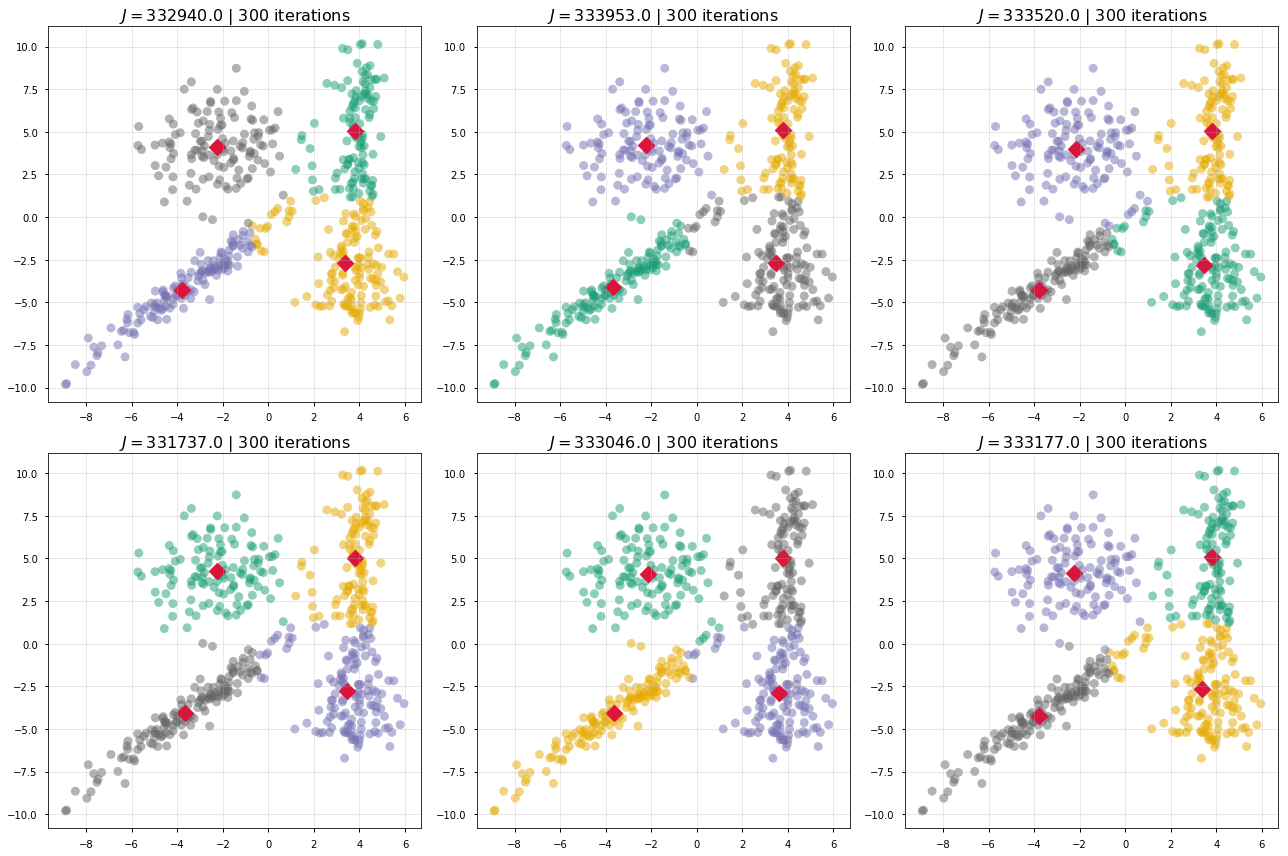

In [6]:
n_row = 2
n_col = 3
seed = [1, 3, 7, 13, 17, 37]

fig, ax = plt.subplots(n_row, n_col, figsize = (18, 12))

distorsions = []
centroids = []

for i in range(n_row):
    for j in range(n_col):
        np.random.seed(seed[n_col*i+j])

        kmeans = KMeans(nr_clusters=4, n_init=1, init='k-means++')
        kmeans.fit(train)

        ax[i][j].scatter(*train.T, c=kmeans.labels_, cmap=CMAP, **plot_kwds)
        ax[i][j].scatter(*kmeans.centroids_.T, marker=MARKER, s=MARKER_SIZE, color=MARKER_COLOR)

        nr_iterations = str(kmeans.n_iter_)
        distortion = round(kmeans.distorsion_,0)
        distorsions += [distortion]
        foo = list(kmeans.centroids_)
        foo.sort(key=lambda x: x[0])
        centroids += [np.array(foo)]

        ax[i][j].set_title(r"$J = $" + str(distortion) + " | " + nr_iterations + " iterations", size=16)
        ax[i][j].grid(alpha=0.3)
plt.tight_layout()

> __Results table__

In [7]:
indexes = [range(1, 7)]
columns = ['normalized J']
for i in range(1,5):
    columns += [r"\mu_{" + str(i) + r", x}"]
    columns += [r"\mu_{" + str(i) + r", y}"]
data = np.hstack([np.array(distorsions).reshape(6,1) / n_sample_train, np.array(centroids).reshape(6, 8)])

pd.DataFrame(data, index=indexes, columns=columns).round(3)

,normalized J,"\mu_{1, x}","\mu_{1, y}","\mu_{2, x}","\mu_{2, y}","\mu_{3, x}","\mu_{3, y}","\mu_{4, x}","\mu_{4, y}"
1,665.880,-3.795,-4.248,-2.240,4.127,3.360,-2.711,3.800,5.034
2,667.906,-3.661,-4.068,-2.245,4.237,3.478,-2.697,3.803,5.105
3,667.040,-3.795,-4.248,-2.142,3.973,3.476,-2.821,3.800,5.034
4,663.474,-3.661,-4.068,-2.245,4.237,3.475,-2.754,3.800,5.034
5,666.092,-3.637,-4.053,-2.155,4.113,3.604,-2.888,3.788,4.999
6,666.354,-3.785,-4.216,-2.239,4.163,3.364,-2.656,3.803,5.105


## Gaussian Mixture Model

_Hypothesis : _ 

$$\forall i\in[\![1,n]\!]\; Z_{i}\sim\mathcal{M}(k,\pi)\text{  and  }\forall j\in[\![1,k]\!]\; X_{i}\mid\{Z_{i}=j\}\sim\mathcal{N}(\mu_{j},\Sigma_{j})\enspace\text{with }\; \mu_{j}\in\mathbb{R}^{d},\, \Sigma_{j}\in\mathcal{S}_{d}^{++}(\mathbb{R})$$

---


 Let $\theta$ denote our set of parameters and $N$ the matrix given by :

$$
N_{ij} = p_{\theta}(X_{i}=x_{i}\mid Z_{i}=j) = \mathcal{N}\left(x_{i}\mid \mu_{j}, \Sigma_{j}\right)
$$

Let the responsability matrix $\tau$ be

$$\tau_{ij} = p_{\theta}(Z_{i}=j\mid X_{i})$$

Then, $\forall i,j$, $\tau{ij}$ is given by : $$\tau_{ij} = \frac{\pi_{j}N_{ij}}{\pi^{T}N_{i,\cdot}}$$

__(E) Step__:

If $\ell$ is our log-likelihood, the Expectation step boils down to the computation of the following expectation w.r.t the law of $Z\mid \{X=x\}$ : 

$$\mathbb{E}_{Z\mid X=x}[\ell(\theta)] = \sum_{i=1}^{n}\sum_{j=1}^{k}\tau_{ij}\log\pi_{j} +\sum_{i=1}^{n}\sum_{j=1}^{k}\tau_{ij}\log N_{ij}$$

__(M) Step__:

We compute the MLE for each parameter, namely $\forall j\in[\![1,k]\!]$

$$
\hat{\pi}_{j} = \frac{1}{n}\sum_{i}\tau_{ij}
$$
$$
\hat{\mu}_{j} = \frac{\sum_{i}\tau_{ij}x_{i}}{\sum_{i}\tau_{ij}}
$$

$$
\hat{\Sigma}_{j} = \frac{\sum_{i}\tau_{ij}(x_{i}-\hat{\mu}_{j})(x_{i}-\hat{\mu}_{j})^{T}}{\sum_{i}\tau_{ij}}
$$

which can be read as the observations, weighted by their probabilty to belong to a given class

### Isotropic Gaussian Mixtures

Under the assumption that $\forall j\in[\![1,k]\!],\, \exists\nu_{j}\in\mathbb{R}\,/\;\Sigma_{j}=\nu_{j}I_{d}$, the extensive formulation of the expectation step becomes :

$$\mathbb{E}_{Z\mid X=x}[\ell(\theta)] = \sum_{i=1}^{n}\sum_{j=1}^{k}\tau_{ij}\log\pi_{j} - \sum_{i=1}^{n}\sum_{j=1}^{k}\tau_{ij}\left[\frac{d}{2}\log 2\pi + \frac{d}{2}\log\nu_{j}+\frac{1}{2\nu_{j}}\|x_{i}-\mu_{j}\|^{2}\right]$$

Hence, while $\hat{\pi}_{j}$ and $\hat{\mu}_{j}$ are not affected by this development, we get :

$$
\hat{\nu}_{j} = \frac{\sum_{i}\tau_{ij}\frac{\|x_{i}-\hat{\mu}_{j}\|^{2}}{d}}{\sum_{i}\tau_{ij}}
$$

### Plotting Mass-coverage Ellipses

The ellipses of level $(1-\eta)\%$ are plotted following the ellipse equation :

$$ (x-\mu_{j})^{T}\Sigma_{j}^{-1}(x-\mu_{j}) = q^{\chi^{2}_{2}}_{1-\eta}$$

Where $q^{\chi_{2}^{2}}_{1-\eta}$ is the quantile of level $(1-\eta)$ of a $\chi^{2}$ distribution with $2$ degrees of freedom

## Plots

> ### Isotropic GM

In [8]:
iso_gmm = IsotropicGM(k=4, initialization="kmeans")
iso_gmm.fit(train)

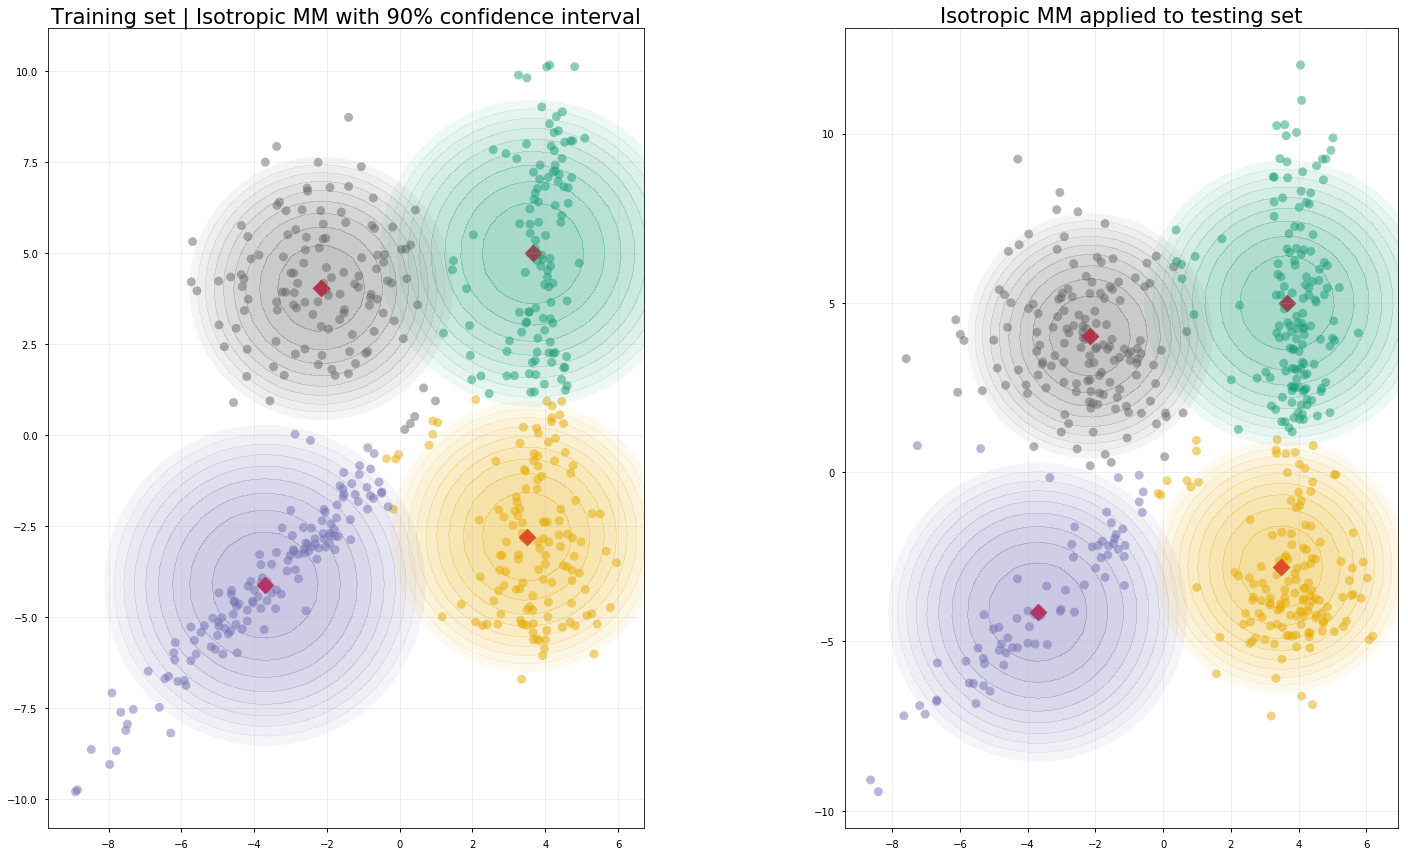

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(22, 12)) 

title = "Training set | Isotropic MM with 90% confidence interval"
iso_gmm.plot_pred(X=train,
                 labels=iso_gmm.labels_,
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[0])
ax[0].set_aspect('equal')

test_labels = iso_gmm.predict(test)
title = "Isotropic MM applied to testing set"
iso_gmm.plot_pred(X=test,
                 labels=test_labels, 
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[1])
ax[1].set_aspect('equal')
plt.tight_layout()

> ### General Gaussian Mixture

In [10]:
gmm = GaussianMixtureModel(k=4, initialization="kmeans")
gmm.fit(train)

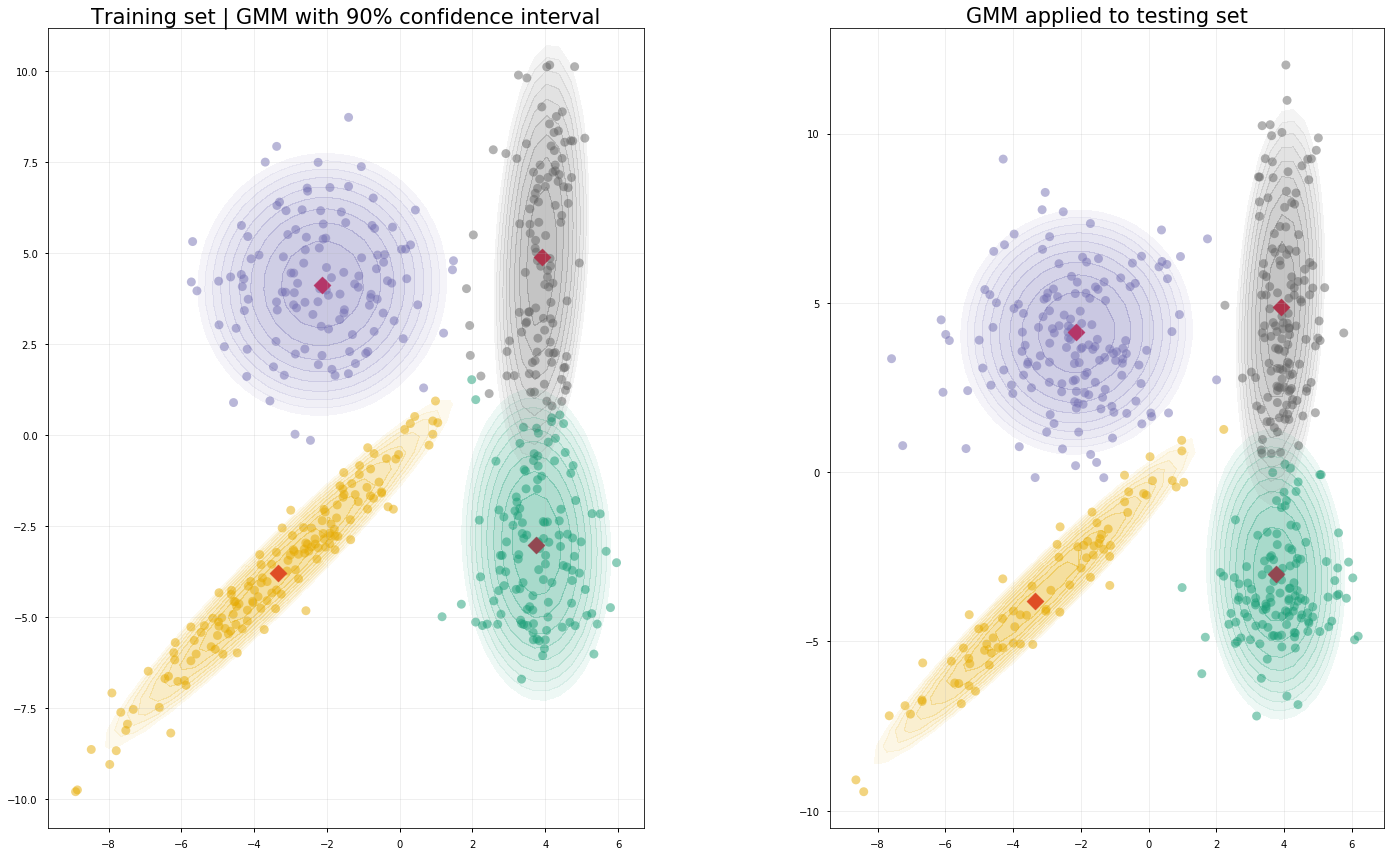

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(22, 12)) 

title = "Training set | GMM with 90% confidence interval"
gmm.plot_pred(X=train,
             labels=gmm.labels_,
             title=title,
             plot_kwds=plot_kwds,
             ax=ax[0])
ax[0].set_aspect('equal')

test_labels = gmm.predict(test)
title = "GMM applied to testing set"
gmm.plot_pred(X=test,
             labels=test_labels, 
             title=title,
             plot_kwds=plot_kwds,
             ax=ax[1])
ax[1].set_aspect('equal')
plt.tight_layout()